Desafio Cientista de Dados - Indicium - Lighthouse

Relatório por Gabriel Bastos Trennepohl - Fevereiro de 2023

Demonstração gráfica entre os dados das máquinas e seus dados de funcionamento versus os tipos de falhas apresentados. 

*Fora descartada a apresentação das falhas randômicas por serem, justamente, randômicas (com 0.1% de ocorrência).

Inicialmente, decidi considerar os dados fornecidos na tabela "desafio_manutencao_preditiva_treino" para definir um padrão. Usando das informações fornecidas nas instruções do desafio e dos dados do arquivo csv extraídos pelos scripts em python, é como determinei como o caminho para realizar a previsão do tipo de falha.  Para isso, recorri a explicações em páginas que tratam sobre o tema. Após, somei meu básico conhecimento em Python e comecei a planejar como manipular os dados para obter o resultado. Sem conhecimentos na área de dados e machine learning, recorri ao auxilio da inteligência artificial. 
De acordo com o que aprendi nas buscas e com o auxílio da inteligência artificial, obtive um código que primeiro pré-processa os dados, convertendo valores não numéricos em valores numéricos e preparando os dados para em sequencia, se ter a previsão para o desafio. Naturalmente, houve a correção e adaptação de códigos para se enquadrarem nas caracteristicas do desafio, como a retirada do valor "type" de consideração, pois seu cálculo de probabilidade esta fora do conjunto de valor considerado relevante (Apresentado no documento com dados gráficos).
Estudando o tema, compreendi que o tipo de problema a ser resolvido é o de regressão, pois está sendo utilizado um conjunto de dados de entrada já analisados, para prever um conjunto de dados de uma situação não analizada.
No presente momento, por ser iniciante na área, não fui capaz de determinar uma medida de performance para apresentar.

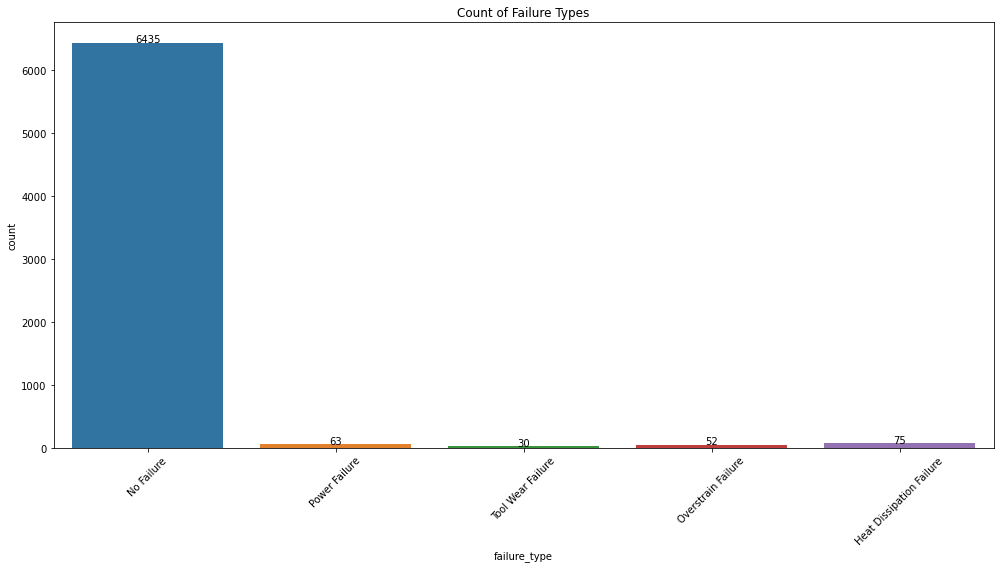

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
df = df[df.failure_type != "Random Failures"]

plt.figure(figsize=(14,8))
ax = sns.countplot(x="failure_type", data=df)
plt.title("Count of Failure Types")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, height, ha="center")
plt.tight_layout()


Figura 1. Gráfico em formato de barra indicando a quantidade de registros para cada tipo de falha

<Figure size 1440x576 with 0 Axes>

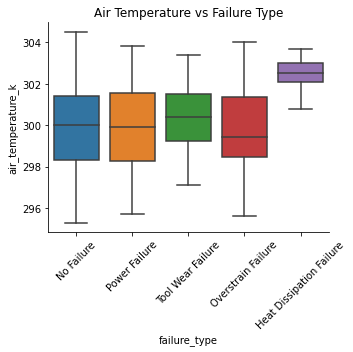

In [2]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="air_temperature_k", kind="box", data=df)
plt.title("Air Temperature vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 2. Gráfico de caixa apresentando a relação entre a temperatura do ar e os tipos de falhas.

<Figure size 1440x576 with 0 Axes>

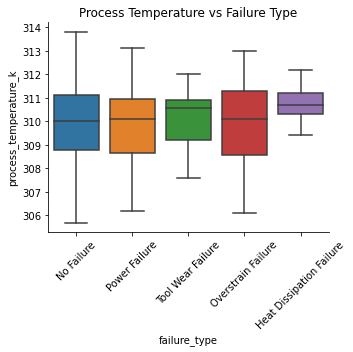

In [3]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="process_temperature_k", kind="box", data=df)
plt.title("Process Temperature vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 3. Gráfico de caixa apresentando a relação entre a temperatura do processo e os tipos de falhas.

<Figure size 1440x576 with 0 Axes>

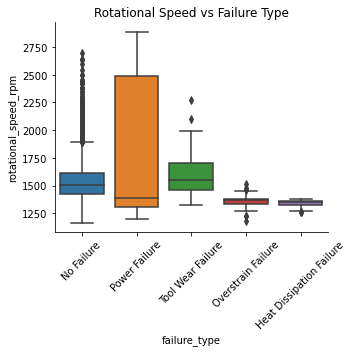

In [4]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="rotational_speed_rpm", kind="box", data=df)
plt.title("Rotational Speed vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 4. Gráfico de caixa apresentando a relação entre a velocidade rotacional em RPM e os tipos de falha

<Figure size 1440x576 with 0 Axes>

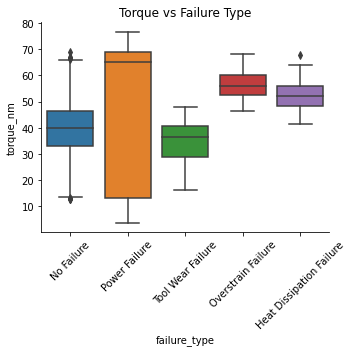

In [5]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="torque_nm", kind="box", data=df)
plt.title("Torque vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()



Figura 5. Gráfico de caixa apresentando a relação entre o torque e os tipos de falhas.

<Figure size 1440x576 with 0 Axes>

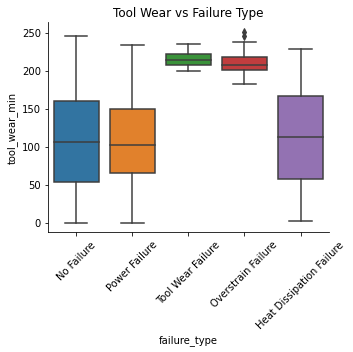

In [6]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="tool_wear_min", kind="box", data=df)
plt.title("Tool Wear vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 6. Gráfico de caixa apresentando a relação entre o desgaste do equipamento e os tipos de falhas.

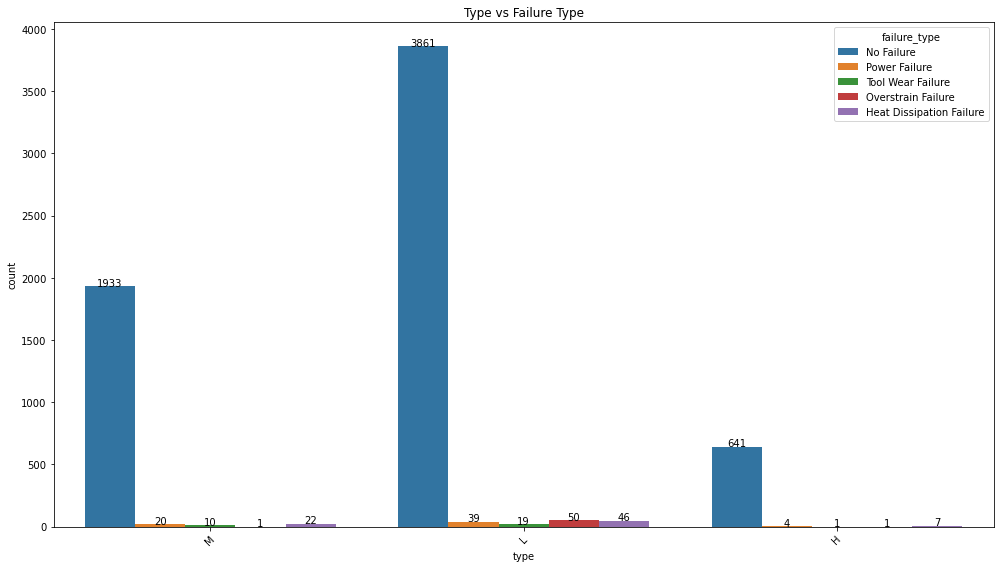

In [7]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="type", hue="failure_type", data=df)
plt.title("Type vs Failure Type")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, height, ha="center")
plt.tight_layout()


Figura 7. Gráfico de barras apresentando a relação entre os três níveis de qualidade do produto e os tipos de falhas.

As demonstrações gráficas acima foram escolhidas para se obter uma percepção visual da incidência dos diferentes tipos de falhas em números e em relação às condições de funcionamento.

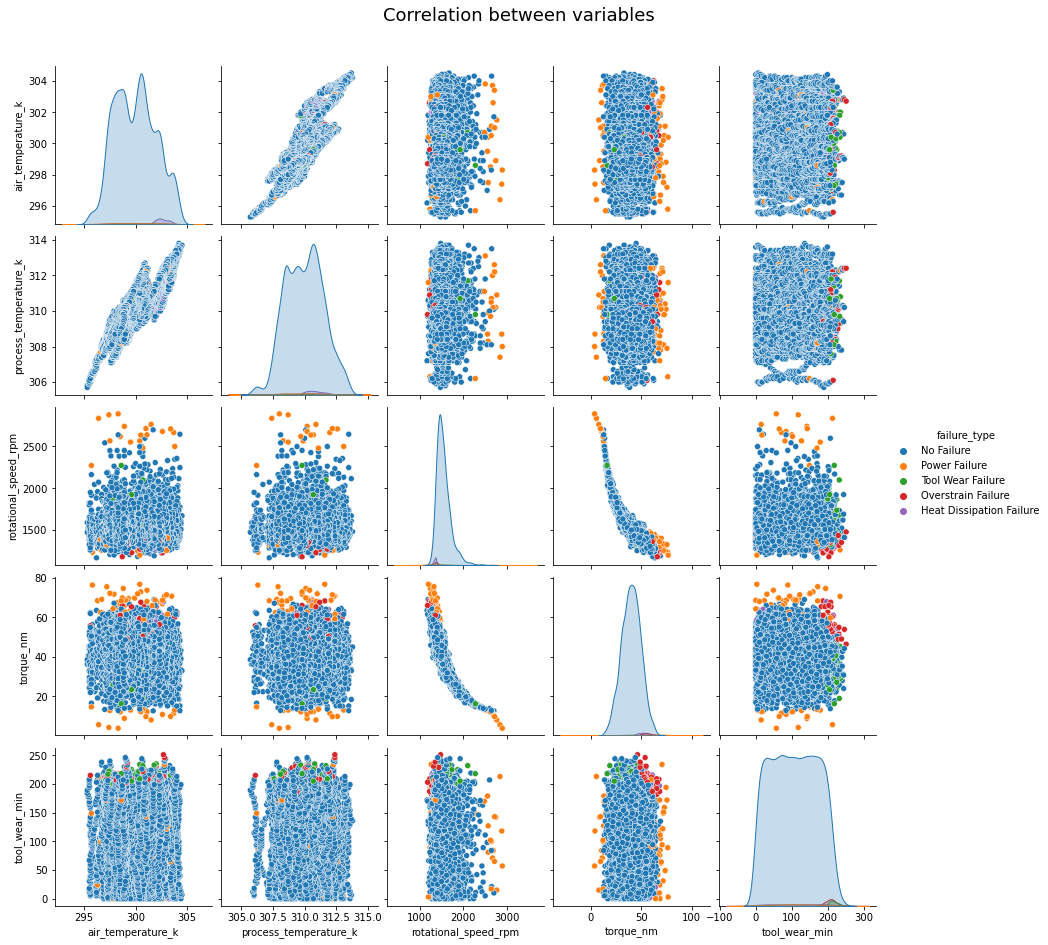

In [8]:
sns.pairplot(df, vars=['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min'], hue='failure_type')
plt.suptitle("Correlation between variables", y=1.05, fontsize=18)

plt.show()


Figura 8. Apresenta uma matriz apresentando correlação entre as variáveis da tabela de treino.

In [9]:
df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
failure_count = df['failure_type'].value_counts()
failure_percent = (failure_count/df.shape[0]) * 100
print("Percentual dos tipos de falhas: \n", failure_percent)

Percentual dos tipos de falhas: 
 No Failure                  96.520174
Heat Dissipation Failure     1.124944
Power Failure                0.944953
Overstrain Failure           0.779961
Tool Wear Failure            0.449978
Random Failures              0.179991
Name: failure_type, dtype: float64


Temos então, os percentuais que representam os tipos de falhas dos dados de treino.
Apresenta se um total de aproximadamente 96.5% de máquinas que não apresentaram falhas e um total de aproximadamente 3.5% que apresentou algum tipo de falha.

A partir deste ponto, tendo adicionado ao arquivo "desafio_manutencao_preditiva_teste.csv" a coluna "failure_type" proveniente da previsão de falhas do código "Pre_Processamento e ML", se tem a comparação estatística dos dados. 
Abaixo as demonstrações gráficas extraídas à partir da previsão de falhas ("desafio_manutencao_preditiva_teste"), para fins de comparação com as extraídas do "treino".

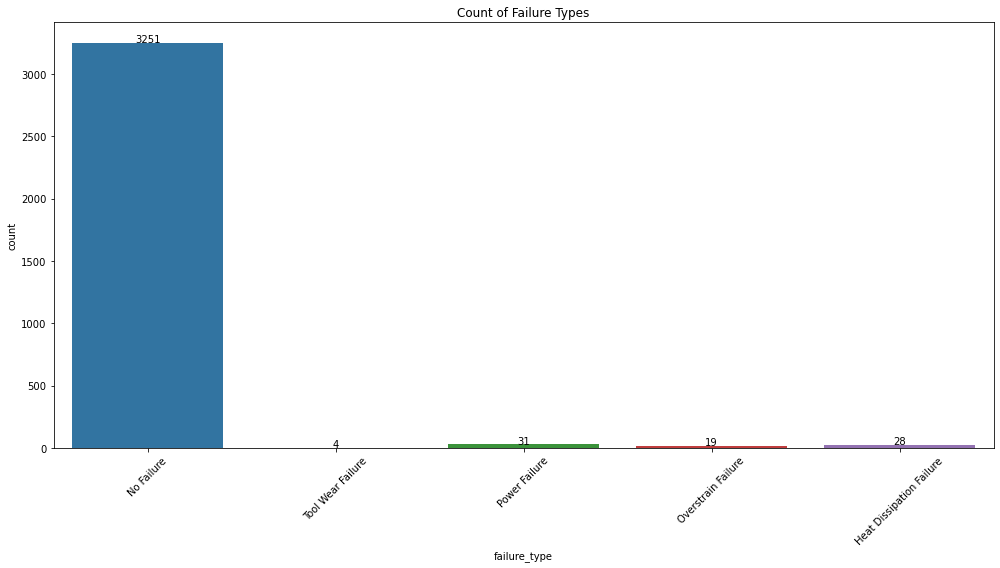

In [19]:
df = pd.read_csv("desafio_manutencao_preditiva_teste.csv")
df = df[df.failure_type != "Random Failures"]

plt.figure(figsize=(14,8))
ax = sns.countplot(x="failure_type", data=df)
plt.title("Count of Failure Types")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, height, ha="center")
plt.tight_layout()




Figura 9. Gráfico em formato de barra indicando a quantidade de registros para cada tipo de falha


<Figure size 1440x576 with 0 Axes>

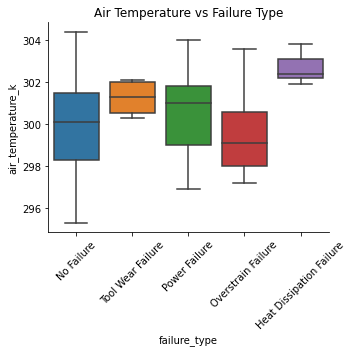

In [18]:
print("Figura 9. Gráfico em formato de barra indicando a quantidade de registros para cada tipo de falha")
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="air_temperature_k", kind="box", data=df)
plt.title("Air Temperature vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 10. Gráfico de caixa apresentando a relação entre a temperatura do ar e os tipos de falhas.


<Figure size 1440x576 with 0 Axes>

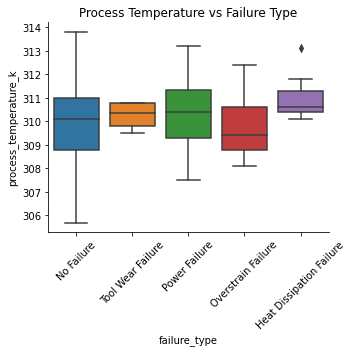

In [20]:
print("Figura 10. Gráfico de caixa apresentando a relação entre a temperatura do ar e os tipos de falhas.")

plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="process_temperature_k", kind="box", data=df)
plt.title("Process Temperature vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 11. Gráfico de caixa apresentando a relação entre a temperatura do processo e os tipos de falhas.


<Figure size 1440x576 with 0 Axes>

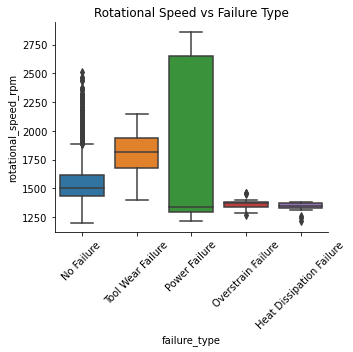

In [21]:
print("Figura 11. Gráfico de caixa apresentando a relação entre a temperatura do processo e os tipos de falhas.")

plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="rotational_speed_rpm", kind="box", data=df)
plt.title("Rotational Speed vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 12. Gráfico de caixa apresentando a relação entre a velocidade rotacional em RPM e os tipos de falha


<Figure size 1440x576 with 0 Axes>

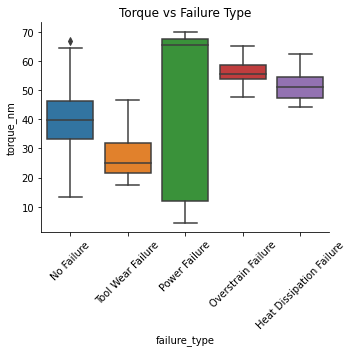

In [22]:
print("Figura 12. Gráfico de caixa apresentando a relação entre a velocidade rotacional em RPM e os tipos de falha")


plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="torque_nm", kind="box", data=df)
plt.title("Torque vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 13. Gráfico de caixa apresentando a relação entre o torque e os tipos de falhas.


<Figure size 1440x576 with 0 Axes>

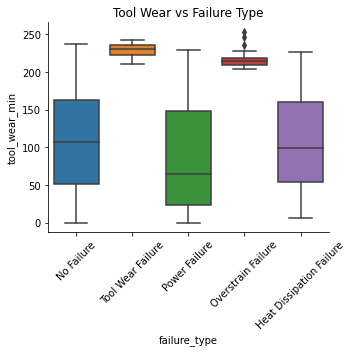

In [23]:
print("Figura 13. Gráfico de caixa apresentando a relação entre o torque e os tipos de falhas.")

plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="tool_wear_min", kind="box", data=df)
plt.title("Tool Wear vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


In [26]:
print("Figura 14. Gráfico de caixa apresentando a relação entre o desgaste do equipamento e os tipos de falhas.")

Figura 14. Gráfico de caixa apresentando a relação entre o desgaste do equipamento e os tipos de falhas.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


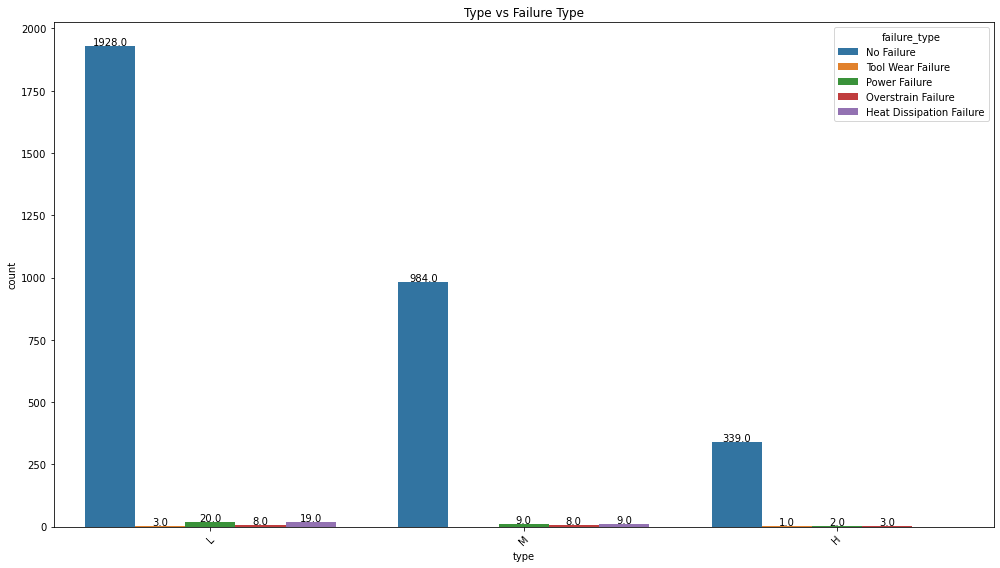

In [27]:

plt.figure(figsize=(14,8))
ax = sns.countplot(x="type", hue="failure_type", data=df)
plt.title("Type vs Failure Type")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, height, ha="center")
plt.tight_layout()


In [28]:
print("Figura 15. Gráfico de barras apresentando a relação entre os três níveis de qualidade do produto e os tipos de falhas.")

Figura 15. Gráfico de barras apresentando a relação entre os três níveis de qualidade do produto e os tipos de falhas.


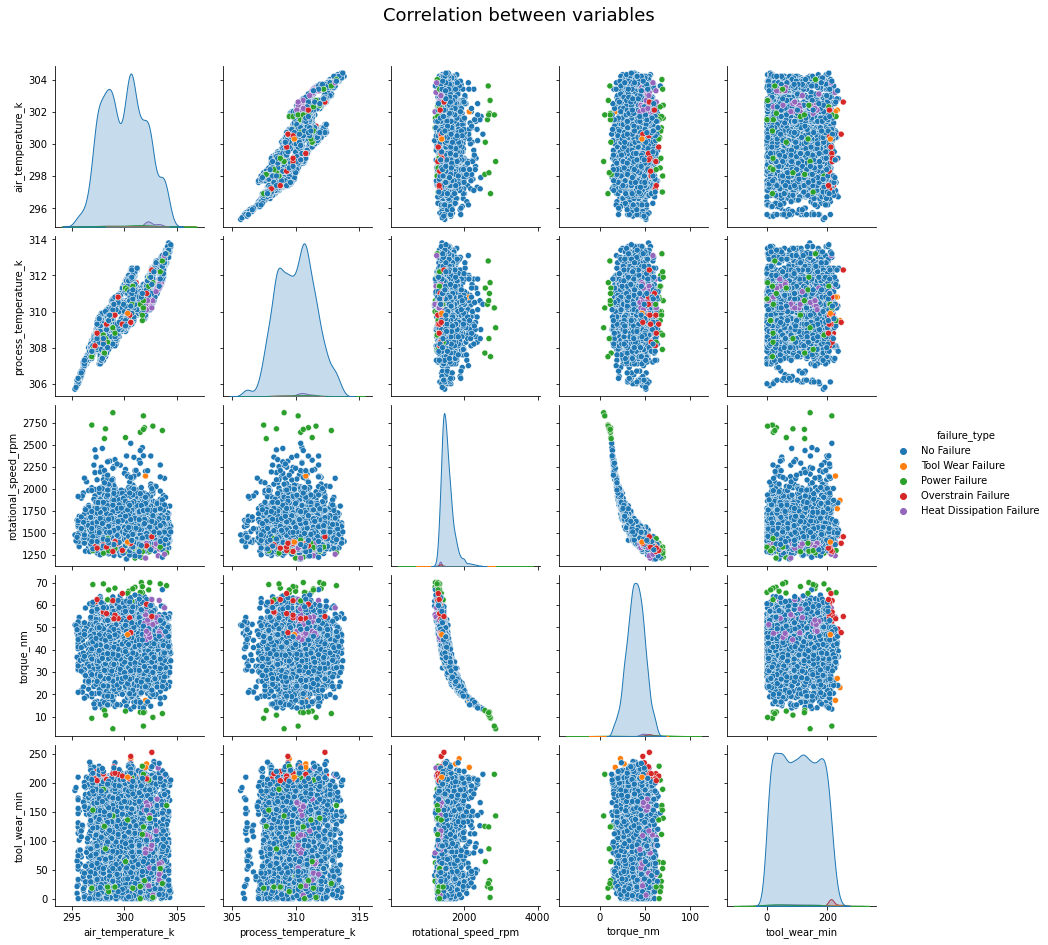

In [8]:
df = pd.read_csv("desafio_manutencao_preditiva_teste.csv")
sns.pairplot(df, vars=['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min'], hue='failure_type')
plt.suptitle("Correlation between variables", y=1.05, fontsize=18)

plt.show()

Figura 16. Apresenta uma matriz apresentando correlação entre as variáveis da tabela de teste.

In [10]:
df = pd.read_csv("desafio_manutencao_preditiva_teste.csv")
failure_count = df['failure_type'].value_counts()
failure_percent = (failure_count/df.shape[0]) * 100
print("Percentual dos tipos de falhas: \n", failure_percent)

Percentual dos tipos de falhas: 
 No Failure                  97.539754
Power Failure                0.930093
Heat Dissipation Failure     0.840084
Overstrain Failure           0.570057
Tool Wear Failure            0.120012
Name: failure_type, dtype: float64


Acima os percentuais que representam os tipos de falhas resultantes da previsão.
Apresenta se um total de aproximadamente 97.5% de máquinas que não apresentaram falhas e um total de aproximadamente 2.5% que apresentou algum tipo de falha. 

In [11]:
df1 = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
df2 = pd.read_csv("desafio_manutencao_preditiva_teste.csv")


failure_count1 = df1['failure_type'].value_counts()
failure_count2 = df2['failure_type'].value_counts()


total_failure_count = failure_count1 + failure_count2

percent_diff = (failure_count2 - failure_count1) / total_failure_count * 100


difference = (failure_count1 - failure_count2) / failure_count1 * 100
print("Percentage Differences between the first and second CSV files for each failure type: \n", difference, "%")

Percentage Differences between the first and second CSV files for each failure type: 
 Heat Dissipation Failure    62.666667
No Failure                  49.479409
Overstrain Failure          63.461538
Power Failure               50.793651
Random Failures                   NaN
Tool Wear Failure           86.666667
Name: failure_type, dtype: float64 %


Acima, foi calculado a diferença percentual da ocorrência de falhas entre o arquivo de treino e de teste. Temos como resultado, um aumento percentual da ocorrência de falhas.

In [12]:
import scipy.stats as stats
import pandas as pd

df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
df['failure_type'] = df['failure_type'].astype("category")
df['type'] = df['type'].astype("category")

grouped = df.groupby("type")["failure_type"]
f_value, p_value = stats.f_oneway(*[grouped.get_group(name).cat.codes for name in grouped.groups])

print("F-value:", f_value)
print("p-value:", p_value)


F-value: 1.1555810639565562
p-value: 0.31493760945976373


Acima, há o resultado do cálculo para considerar se há relevância do tipo da máquina (H,L ou M) no evento de falhas. De acordo com o valor p, que é apresentado como 0.31 ou 31%, e levando em consideração que o valor de probilidade relevante deve ser igual ou menor que 0.05 ou 5%, se tem a presunção que o tipo da máquina não influencia significativamente no acontecimento de falhas.